<a href="https://colab.research.google.com/github/akul-bharadwaj/Computer-Vision-Assessment-Planogram-Dataset/blob/main/gap_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fine-tuning YOLOv8 with Shelf Images for Planogram dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
!git clone https://github.com/akul-bharadwaj/Computer-Vision-Assessment-Planogram-Dataset

Cloning into 'Computer-Vision-Assessment-Planogram-Dataset'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 635.80 KiB | 4.05 MiB/s, done.


## Loading the dataset from Kaggle

In [6]:
import kagglehub
import shutil
import os

# Download the dataset (default location)
downloaded_path = kagglehub.dataset_download("aamiraliansari/shelf-images-for-planograms")

destination_path = "Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms"

os.makedirs(destination_path, exist_ok=True)

# Move all contents to the custom folder
for item in os.listdir(downloaded_path):
    s = os.path.join(downloaded_path, item)
    d = os.path.join(destination_path, item)
    if os.path.isdir(s):
        shutil.move(s, d)
    else:
        shutil.move(s, d)

print("Dataset moved to:", destination_path)

100%|██████████| 224M/224M [00:01<00:00, 207MB/s]

Extracting files...


Dataset moved to: Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms


## Modifying the *data.yaml* file



In [16]:
with open('Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/data.yaml', 'w') as f:
    f.write('''
train: /content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/train/images
val: /content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/valid/images

nc: 1
names: ['void']
''')

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Unin

## Model Training and Validation to detect gaps

In [4]:
from ultralytics import YOLO

# Start training from scratch or from pretrained YOLOv8s
model = YOLO("yolov8s.pt")  # or yolov8n.pt for smaller

# Train on your dataset (replace with your data.yaml)
model.train(data="Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/data.yaml", epochs=50, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 39.8MB/s]


Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

100%|██████████| 755k/755k [00:00<00:00, 131MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

Model summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 268MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.3 ms, read: 0.1±0.0 MB/s, size: 87.9 KB)


train: Scanning /content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/train/labels... 2023 images, 76 backgrounds, 0 corrupt: 100%|██████████| 2095/2095 [04:05<00:00,  8.54it/s]


train: New cache created: /content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 65, len(boxes) = 12206. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.1±0.0 MB/s, size: 94.9 KB)


val: Scanning /content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/valid/labels... 249 images, 0 backgrounds, 0 corrupt: 100%|██████████| 249/249 [00:35<00:00,  7.10it/s]

val: New cache created: /content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1591. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.66G       2.12      2.353      1.544         77        640: 100%|██████████| 131/131 [00:15<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]


                   all        249       1591      0.552      0.426      0.451      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.46G      1.864       1.65      1.405        172        640: 100%|██████████| 131/131 [00:13<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.00it/s]

                   all        249       1591      0.627      0.486      0.475       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.46G      1.848      1.645      1.399         98        640: 100%|██████████| 131/131 [00:14<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.65it/s]

                   all        249       1591       0.66       0.59      0.633      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.49G       1.82       1.57      1.394        132        640: 100%|██████████| 131/131 [00:14<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.79it/s]

                   all        249       1591      0.643      0.527      0.581       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.49G      1.785      1.537      1.368        112        640: 100%|██████████| 131/131 [00:12<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.72it/s]

                   all        249       1591      0.621      0.534       0.55      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.49G      1.723      1.475      1.342        121        640: 100%|██████████| 131/131 [00:12<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.57it/s]

                   all        249       1591      0.619      0.609      0.645      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.49G      1.734      1.473      1.335         80        640: 100%|██████████| 131/131 [00:14<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.40it/s]

                   all        249       1591      0.715      0.613      0.684      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.53G      1.684      1.418      1.308        199        640: 100%|██████████| 131/131 [00:13<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.62it/s]

                   all        249       1591      0.676      0.647      0.704      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.53G       1.68      1.405      1.312        183        640: 100%|██████████| 131/131 [00:14<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.70it/s]

                   all        249       1591      0.645      0.619      0.654      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.57G      1.648      1.396      1.299        123        640: 100%|██████████| 131/131 [00:12<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.71it/s]

                   all        249       1591      0.694      0.647       0.72      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.57G      1.634      1.376      1.297        136        640: 100%|██████████| 131/131 [00:14<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.97it/s]

                   all        249       1591      0.741      0.651       0.74      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.57G      1.619      1.349       1.28        106        640: 100%|██████████| 131/131 [00:13<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]

                   all        249       1591      0.645      0.668      0.724      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.57G       1.62       1.35      1.284        132        640: 100%|██████████| 131/131 [00:12<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.95it/s]

                   all        249       1591      0.706      0.651       0.73      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.57G      1.584       1.32      1.266        162        640: 100%|██████████| 131/131 [00:12<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.97it/s]

                   all        249       1591      0.729      0.698      0.772      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.57G       1.57      1.295      1.266        141        640: 100%|██████████| 131/131 [00:14<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.77it/s]

                   all        249       1591      0.695        0.7      0.746      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.57G      1.575      1.301      1.264        145        640: 100%|██████████| 131/131 [00:12<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.71it/s]

                   all        249       1591      0.723      0.698      0.774      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.57G      1.543      1.258      1.258        104        640: 100%|██████████| 131/131 [00:14<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.29it/s]

                   all        249       1591      0.735      0.686      0.764      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.57G      1.534      1.242      1.243        108        640: 100%|██████████| 131/131 [00:12<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.41it/s]

                   all        249       1591      0.748      0.719      0.785        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.57G      1.531      1.247      1.245        147        640: 100%|██████████| 131/131 [00:14<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.57it/s]

                   all        249       1591      0.772       0.69      0.795      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.57G      1.504       1.22      1.233         94        640: 100%|██████████| 131/131 [00:14<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.76it/s]

                   all        249       1591      0.748      0.723        0.8      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.57G      1.487      1.197      1.228        112        640: 100%|██████████| 131/131 [00:13<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.46it/s]

                   all        249       1591      0.729      0.733      0.795      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.57G      1.474      1.189      1.218        108        640: 100%|██████████| 131/131 [00:12<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]

                   all        249       1591      0.776      0.718      0.805      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.57G      1.456       1.17      1.218        146        640: 100%|██████████| 131/131 [00:14<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.93it/s]

                   all        249       1591       0.77      0.752      0.827       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.57G      1.451      1.147      1.204         96        640: 100%|██████████| 131/131 [00:14<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.49it/s]

                   all        249       1591      0.786      0.724      0.828      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.57G      1.422      1.133      1.197        143        640: 100%|██████████| 131/131 [00:14<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.58it/s]

                   all        249       1591       0.77      0.751      0.834      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.57G      1.427      1.126      1.204        113        640: 100%|██████████| 131/131 [00:14<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.53it/s]

                   all        249       1591      0.799      0.743      0.835      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.57G      1.426       1.14      1.193         96        640: 100%|██████████| 131/131 [00:12<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.50it/s]

                   all        249       1591      0.828      0.728      0.835      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.57G      1.405        1.1      1.189         98        640: 100%|██████████| 131/131 [00:14<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.67it/s]

                   all        249       1591      0.791      0.729      0.829      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.57G      1.388      1.086      1.182        105        640: 100%|██████████| 131/131 [00:12<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.84it/s]

                   all        249       1591      0.788      0.779       0.85      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.57G      1.397      1.079      1.181         62        640: 100%|██████████| 131/131 [00:14<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.69it/s]

                   all        249       1591      0.825      0.749      0.849      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.57G      1.384      1.091      1.179        145        640: 100%|██████████| 131/131 [00:13<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]

                   all        249       1591      0.786      0.749      0.845      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.57G      1.358      1.056      1.164        126        640: 100%|██████████| 131/131 [00:12<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.74it/s]

                   all        249       1591      0.826      0.759      0.855      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.57G      1.357      1.045      1.173        120        640: 100%|██████████| 131/131 [00:13<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.95it/s]

                   all        249       1591      0.836       0.74      0.854      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.6G      1.338      1.019      1.151         99        640: 100%|██████████| 131/131 [00:12<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.67it/s]

                   all        249       1591      0.832      0.759      0.863      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       4.6G      1.332      1.016       1.15        105        640: 100%|██████████| 131/131 [00:14<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.13it/s]

                   all        249       1591      0.817      0.792       0.87      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       4.6G      1.324      1.025      1.155        132        640: 100%|██████████| 131/131 [00:12<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.64it/s]

                   all        249       1591      0.824      0.778      0.866       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       4.6G      1.313      1.002      1.143        132        640: 100%|██████████| 131/131 [00:13<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.93it/s]

                   all        249       1591      0.824      0.778      0.871      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       4.6G      1.302     0.9857      1.149         89        640: 100%|██████████| 131/131 [00:13<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.92it/s]

                   all        249       1591      0.824      0.788      0.873      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       4.6G      1.276     0.9688       1.13        104        640: 100%|██████████| 131/131 [00:12<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.82it/s]

                   all        249       1591      0.833      0.766      0.868      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.6G      1.288     0.9719      1.136         94        640: 100%|██████████| 131/131 [00:12<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.54it/s]

                   all        249       1591      0.842      0.759      0.868      0.612


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.6G      1.265     0.9692       1.16         88        640: 100%|██████████| 131/131 [00:13<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.68it/s]

                   all        249       1591      0.845      0.772      0.866      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       4.6G      1.242     0.9414      1.155        104        640: 100%|██████████| 131/131 [00:13<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.65it/s]

                   all        249       1591      0.833      0.776      0.867      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       4.6G      1.238     0.9257      1.147         69        640: 100%|██████████| 131/131 [00:12<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.86it/s]

                   all        249       1591      0.845      0.779      0.875      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       4.6G      1.211     0.9089      1.138         84        640: 100%|██████████| 131/131 [00:14<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.49it/s]

                   all        249       1591      0.842      0.788      0.879      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       4.6G      1.197     0.9004      1.137         73        640: 100%|██████████| 131/131 [00:13<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.65it/s]

                   all        249       1591      0.825      0.786      0.875      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       4.6G      1.196     0.8902      1.128         76        640: 100%|██████████| 131/131 [00:12<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]

                   all        249       1591       0.86      0.787      0.886      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       4.6G      1.184     0.8739      1.124         68        640: 100%|██████████| 131/131 [00:13<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.74it/s]

                   all        249       1591      0.867      0.772      0.879       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       4.6G      1.158     0.8538      1.119         67        640: 100%|██████████| 131/131 [00:13<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.37it/s]

                   all        249       1591       0.84      0.787      0.879       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       4.6G      1.154     0.8411      1.105         59        640: 100%|██████████| 131/131 [00:13<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.81it/s]

                   all        249       1591      0.852      0.794      0.884      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       4.6G      1.142     0.8362      1.103         92        640: 100%|██████████| 131/131 [00:13<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.50it/s]

                   all        249       1591      0.866       0.78      0.885      0.644



50 epochs completed in 0.214 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]


                   all        249       1591      0.854      0.794      0.884      0.647
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac362ae1f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Testing the model for few images from test set

In [5]:
model = YOLO("/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/runs/detect/train/weights/best.pt")

In [8]:
img_path_1 = '/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/test/images/test2020_1167_jpg.rf.9dd75758a95b919ac895d46172d2b555.jpg'
results_1 = model(img_path_1)[0]


image 1/1 /content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/test/images/test2020_1167_jpg.rf.9dd75758a95b919ac895d46172d2b555.jpg: 640x640 27 voids, 10.7ms
Speed: 2.8ms preprocess, 10.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


In [12]:
import cv2
import matplotlib.pyplot as plt

img_1 = cv2.imread(img_path_1)
img_1 = img_1.copy()

# Draw bounding boxes
for box in results_1.boxes.xyxy.cpu().numpy():
    x1, y1, x2, y2 = map(int, box[:4])
    cv2.rectangle(img_1, (x1, y1), (x2, y2), (0, 0, 255), 2)

for box, conf, cls in zip(results_1.boxes.xyxy.cpu().numpy(),
                          results_1.boxes.conf.cpu().numpy(),
                          results_1.boxes.cls.cpu().numpy()):
    x1, y1, x2, y2 = map(int, box[:4])
    label = f"{int(cls)}: {conf:.2f}"
    cv2.rectangle(img_1, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.putText(img_1, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

cv2.imwrite("/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/output_YOLO_1.jpg", img_1)

True

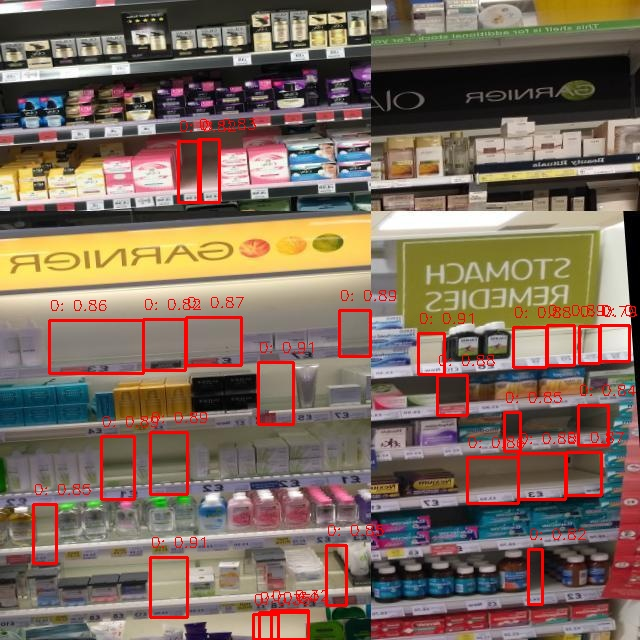

In [13]:
from IPython.display import Image
Image("/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/output_YOLO_1.jpg")

In [14]:
img_path_2 = '/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/test/images/test2020_462_jpg.rf.700c963622ac44b8b4c9426883fe4f0c.jpg'
results_2 = model(img_path_2)[0]


image 1/1 /content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/datasets/shelf_planograms/DATASET_Planogram/test/images/test2020_462_jpg.rf.700c963622ac44b8b4c9426883fe4f0c.jpg: 640x640 16 voids, 9.6ms
Speed: 2.7ms preprocess, 9.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


In [16]:
img_2 = cv2.imread(img_path_2)
img_2 = img_2.copy()


# Draw bounding boxes
for box in results_2.boxes.xyxy.cpu().numpy():
    x1, y1, x2, y2 = map(int, box[:4])
    cv2.rectangle(img_1, (x1, y1), (x2, y2), (0, 0, 255), 2)

for box, conf, cls in zip(results_2.boxes.xyxy.cpu().numpy(),
                          results_2.boxes.conf.cpu().numpy(),
                          results_2.boxes.cls.cpu().numpy()):
    x1, y1, x2, y2 = map(int, box[:4])
    label = f"{int(cls)}: {conf:.2f}"
    cv2.rectangle(img_2, (x1, y1), (x2, y2), (0, 0, 255), 2)
    cv2.putText(img_2, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

cv2.imwrite("/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/output_YOLO_2.jpg", img_2)

True

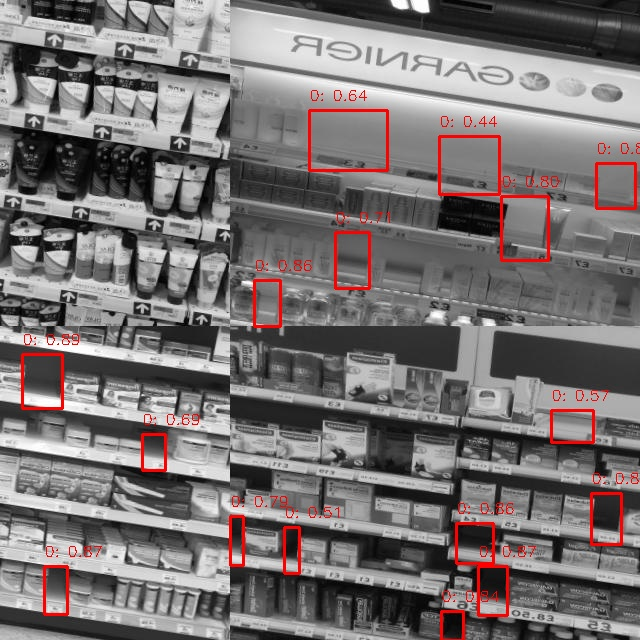

In [17]:
from IPython.display import Image
Image("/content/drive/MyDrive/Computer-Vision-Assessment-Planogram-Dataset/output_YOLO_2.jpg")